<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [ ]:
# you can write your code here

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)
X_cv,X_test,y_cv,y_test = train_test_split(X_test,y_test,test_size =0.5,random_state=42)

print(X_train.shape,X_cv.shape,X_test.shape)

(3000, 5) (1000, 5) (1000, 5)


In [ ]:
clf = SVC(gamma = 0.001, C =100)
clf.fit(X_train,y_train)

SVC(C=100, gamma=0.001)

In [ ]:
def kernel(support_vectors,X,gamma):
  kernels= np.zeros((X.shape[0],support_vectors.shape[0]))
  for idx , xi in enumerate(X):
    for id, xq in enumerate(support_vectors):
      k = np.sum((xi-xq) **2,axis = -1)
      kernel = np.exp(-(gamma) * k )
      kernels[idx][id] = kernel
  return kernels

In [ ]:
def svm_decision_function(X,dual_coef,intercept,support_vectors,gamma):
  kernels= kernel(support_vectors,X,gamma)
  svm_df= np.sum((dual_coef * kernels),axis= -1)+ intercept
  return svm_df

In [ ]:
fcv = svm_decision_function(X_cv,clf.dual_coef_,clf.intercept_,clf.support_vectors_,0.001)

In [ ]:
X_cv_fcv = clf.decision_function(X_cv)
np.where(fcv - X_cv_fcv > 10e-1)

(array([], dtype=int64),)

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


In [ ]:
def sigmoid(x,weight,intercept):
  z= np.dot(x,weight.T)+intercept
  sig_z= 1/(1+np.exp(-z))
  return sig_z
  
def log_loss(weight,intercept,X,Y):
  N = len(X)
  sum_log=0
  for i in range(N):
    sum_log+=Y[i]*np.log10(sigmoid(weight,X[i],intercept)) + (1-Y[i])*np. log10(1-sigmoid(weight,X[i],intercept))
  return -1*sum_log/N

In [ ]:
N_pos = np.count_nonzero(y_train)
N_neg = len(y_cv) - np.count_nonzero(y_train)

calibrated_y_pos = (N_pos + 1)/(N_pos + 2)
calibrated_y_neg = 1/(N_neg + 2)

updated_y =[]
for i in y_cv:
  if i == 1:
    updated_y.append(calibrated_y_pos)
  else:
    updated_y.append(calibrated_y_neg)

w= np.zeros_like(fcv[0])
b=0
N= len(fcv)
eta0 =0.001
alpha= 0.0001
epoch = 15
ycv=updated_y
cv_loss=[]
for i in range(epoch):
  for j in range(N):
    w = ((1-((eta0*alpha)/N)) * w) + (eta0 * fcv[j]) * (ycv[j] -sigmoid(fcv[j],w,b))
    b = b + (eta0)*(ycv[j] - sigmoid(fcv[j],w,b))
  logloss1 = log_loss(w,b,fcv,ycv)
  cv_loss.append(logloss1)

In [ ]:
print('w : ',w)
print('b : ',b)

w :  1.5113992095633473
b :  -0.054909327695576535


In [ ]:
epoch = np.arange(0,15,1)
len(cv_loss)
len(epoch)

15

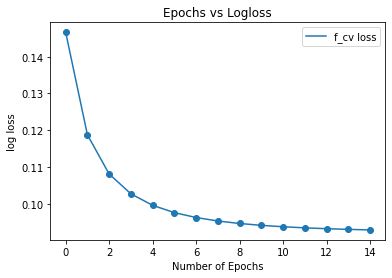

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epoch,cv_loss,label='f_cv loss')
plt.scatter(epoch,cv_loss)
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel('log loss')
plt.title('Epochs vs Logloss')
plt.show()

In [ ]:
f_X_test =svm_decision_function(X_test,clf.dual_coef_,clf.intercept_,clf.support_vectors_,0.001)

In [ ]:
X_test_prob = sigmoid(f_X_test,w,b)
for idx,i in enumerate(X_test_prob):
  print('{} : {}'.format(idx+1,i))

1 : 0.07623080648230797
2 : 0.04174165414384586
3 : 0.2234784136571021
4 : 0.032590567468447115
5 : 0.002974737024003297
6 : 0.00919730999290761
7 : 0.023431118939758626
8 : 0.9873978731896588
9 : 0.005694640286142878
10 : 0.8645023148045222
11 : 0.036474272926246165
12 : 0.810447597051622
13 : 0.31111293258765205
14 : 0.04273300332978317
15 : 0.23429338803534913
16 : 0.9932541013582399
17 : 0.006634476301794684
18 : 0.010447117469004228
19 : 0.12844295836837144
20 : 0.01230369659293888
21 : 0.9459702334370618
22 : 0.03783308339324049
23 : 0.9193404277639471
24 : 0.12943092447065926
25 : 0.03470085235267017
26 : 0.7356063870976344
27 : 0.928459387722068
28 : 0.19854587652337186
29 : 0.013478104029898245
30 : 0.8025571328318415
31 : 0.033955341883533434
32 : 0.9685434966226374
33 : 0.06248051569139898
34 : 0.00475285994390449
35 : 0.010738745246798121
36 : 0.1077312151327048
37 : 0.12379349574359202
38 : 0.027154978898296996
39 : 0.9502631310256991
40 : 0.005724135986773729
41 : 0.00159